In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

import OrthogonalPolynomials
# Reloading the module
import importlib
importlib.reload(OrthogonalPolynomials)
from OrthogonalPolynomials import *

## Legendre collocation method for 1D diffusion equation

In [2]:
# Node range: 0,1,...,N
N = 20
# Legendre Gauss Lobatto nodes
x = LegendreGaussLobattoNodes(N)
# Barycentric weights
w_bary = BarycentricWeights(x)
# Differentiation matrix
D = PolynomialDiffMatrix(x, w_bary)
# Differentiation matrix for the 2nd-order derivative
D2 = PolynomialDiffMatrix_HighOrder(2, x, w_bary, D)

In [3]:
# IC
def InitCond_1D_Diffusion(x):
    # Calculating the initial value at x
    return 1-x**2

u0 = np.zeros(N+1)
# The initial condition function may not be vectorized
# So we use a for loop to calculate the initial nodal values separately
for j in range(N+1):
    u0[j] = InitCond_1D_Diffusion(x[j])
    
# BC:
u_left = 0
u_right = 0

In [4]:
# Evaluate the RHS of the ODE system
def RHS_1D_Diffusion_DiffMat(t, u, D2, N, u_left, u_right):
    # Evaluate the RHS of the ODE system for the 1D diffusion equation
    # Calculated with the 2nd-order differentiation matrix
    # Note that u_0 and u_N are fixed
    # We only need to solve u1,...,u_{N-1}
    # u: u1 ... u_{N-1}
    # D2: 2nd-order differentiation matrix
    # N: the largest node index
    # u_left: left bondary value
    # u_right: right boundary value
    
    # Adding the boundary values 
    u_all = np.concatenate(( np.array([u_left]), u, np.array([u_right]) ))
    RHS = np.dot(D2, u_all)
    # Only return the right-hand sides for u1 ... u_{N-1}
    return RHS[1:-1]

Text(0.5, 1.0, '$u_t=u_{xx}$')

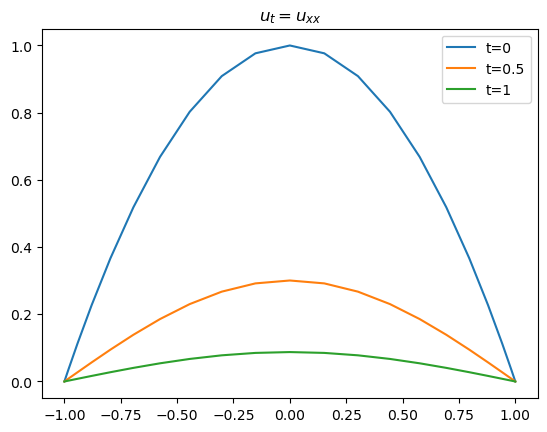

In [5]:
# Scipy calculation
t_span = [0, 1]
t_eval=[0,0.5,1]
sol = solve_ivp(RHS_1D_Diffusion_DiffMat, 
                t_span=t_span, 
                y0=u0[1:-1], 
                method='RK45', 
                t_eval=t_eval, 
                args=(D2, N, u_left, u_right))

fig = plt.figure()
ax = fig.add_subplot(111)

Nt = len(t_eval)
for it in range(Nt):
    u = np.concatenate(( np.array([u_left]), sol.y[:,it], np.array([u_right]) ))
    ax.plot(x, u, label='t={}'.format(t_eval[it]))


ax.legend()
ax.set_title(r'$u_t=u_{xx}$')

Text(0.5, 1.0, '$u_t=u_{xx}$')

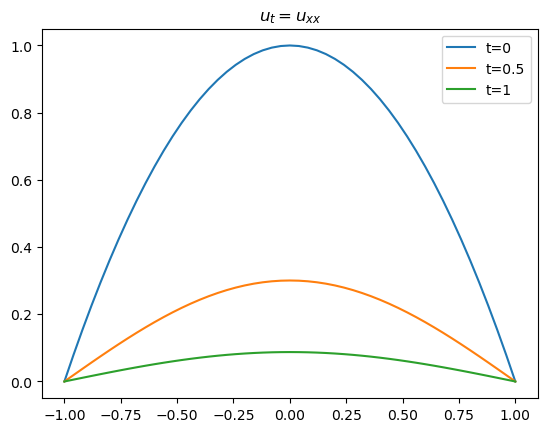

In [6]:
# Interpolating to a finer grid for plotting purpose
y = np.linspace(-1,1,51)
T = InterpolatingMatrix(x, y, w_bary)

fig = plt.figure()
ax = fig.add_subplot(111)

Nt = len(t_eval)
for it in range(Nt):
    u = np.concatenate(( np.array([u_left]), sol.y[:,it], np.array([u_right]) ))
    u_newgrid = np.dot(T, u)
    ax.plot(y, u_newgrid, label='t={}'.format(t_eval[it]))


ax.legend()
ax.set_title(r'$u_t=u_{xx}$')


## Benchmark example in 4.4.3 of the book

Text(0.5, 1.0, '$u_t=u_{xx}$')

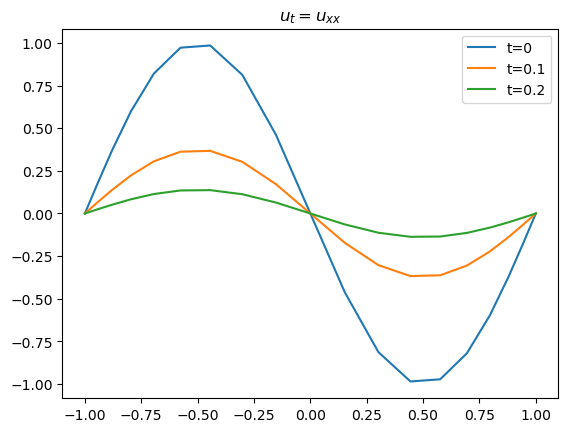

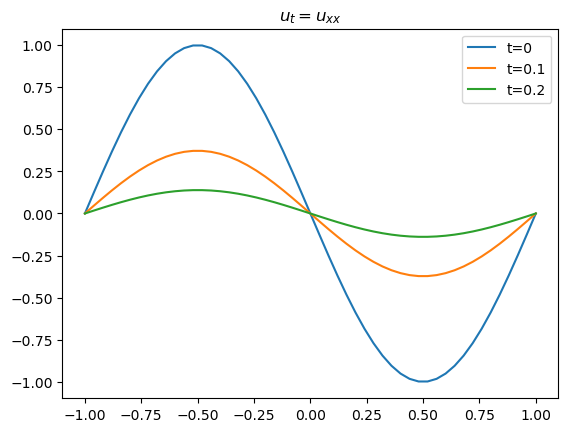

In [7]:
# IC
def InitCond_1D_Diffusion(x):
    # Calculating the initial value at x
    return np.sin(np.pi*(x+1))

u0 = np.zeros(N+1)
# The initial condition function may not be vectorized
# So we use a for loop to calculate the initial nodal values separately
for j in range(N+1):
    u0[j] = InitCond_1D_Diffusion(x[j])
    
# BC:
u_left = 0
u_right = 0

# Scipy calculation
t_span = [0, 0.2]
t_eval=[0,0.1,0.2]
sol = solve_ivp(RHS_1D_Diffusion_DiffMat, 
                t_span=t_span, 
                y0=u0[1:-1], 
                method='RK45', 
                t_eval=t_eval, 
                args=(D2, N, u_left, u_right))

fig = plt.figure()
ax = fig.add_subplot(111)

Nt = len(t_eval)
for it in range(Nt):
    u = np.concatenate(( np.array([u_left]), sol.y[:,it], np.array([u_right]) ))
    ax.plot(x, u, label='t={}'.format(t_eval[it]))


ax.legend()
ax.set_title(r'$u_t=u_{xx}$')


# Interpolating to a finer grid for plotting purpose
y = np.linspace(-1,1,51)
T = InterpolatingMatrix(x, y, w_bary)

fig = plt.figure()
ax = fig.add_subplot(111)

Nt = len(t_eval)
for it in range(Nt):
    u = np.concatenate(( np.array([u_left]), sol.y[:,it], np.array([u_right]) ))
    u_newgrid = np.dot(T, u)
    ax.plot(y, u_newgrid, label='t={}'.format(t_eval[it]))


ax.legend()
ax.set_title(r'$u_t=u_{xx}$')
